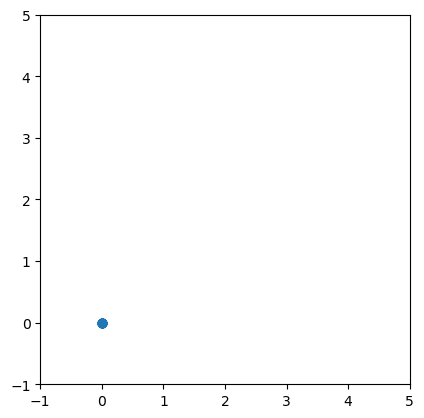

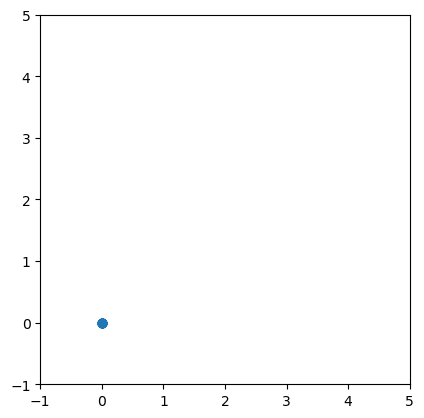

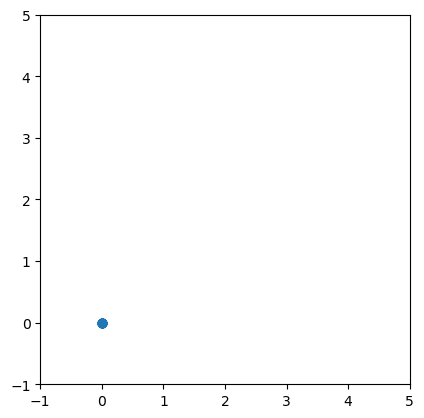

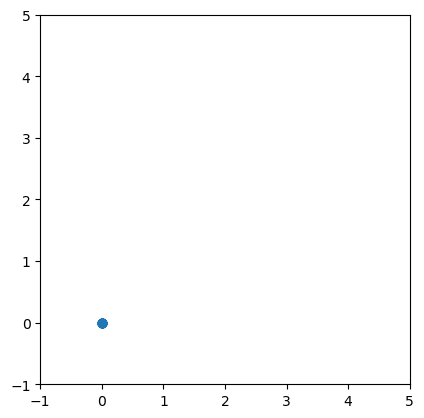

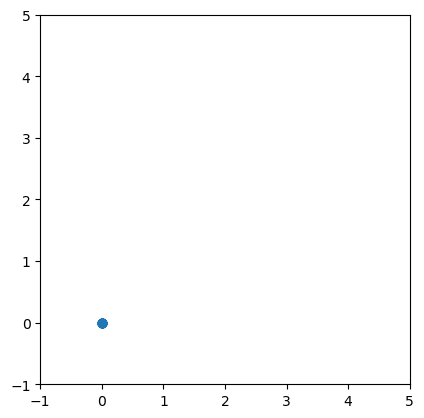

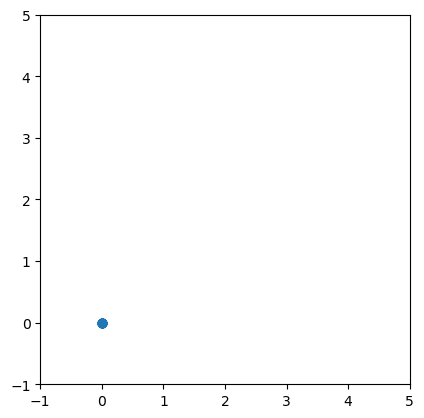

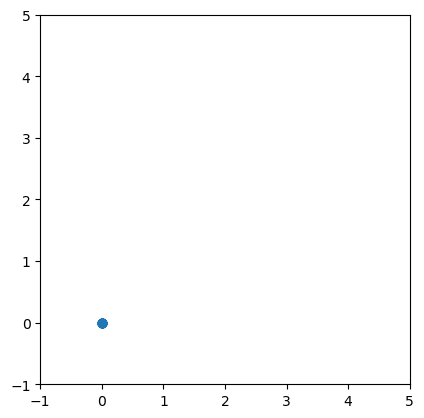

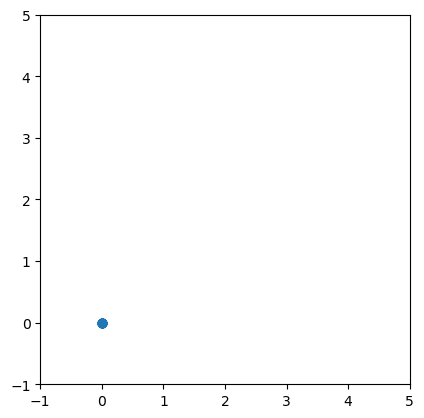

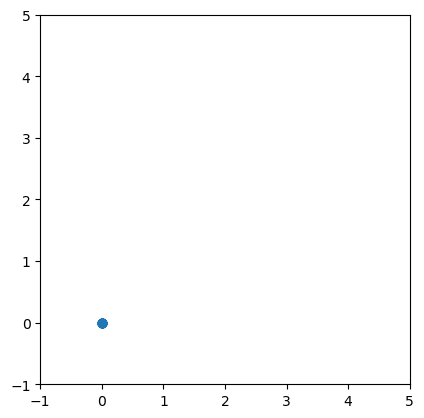

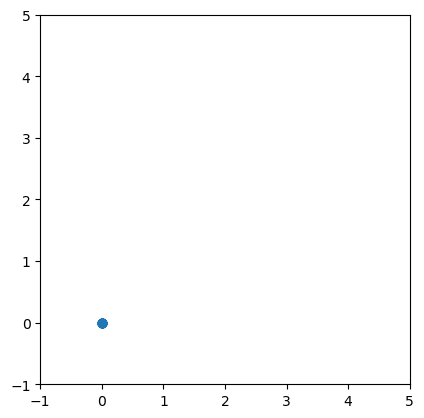

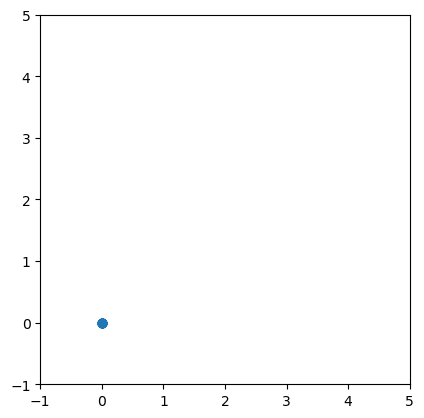

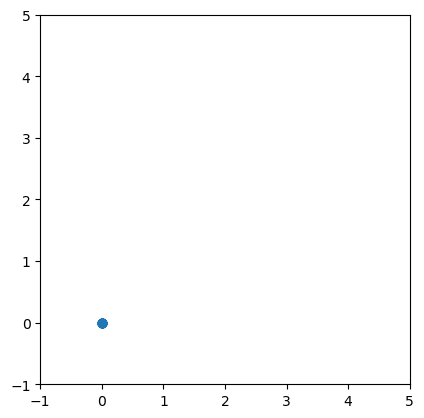

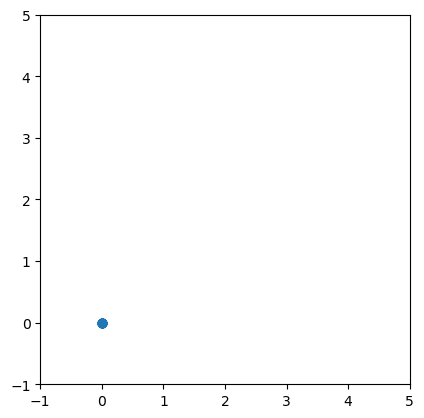

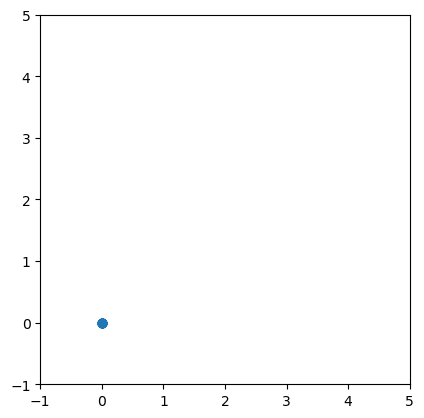

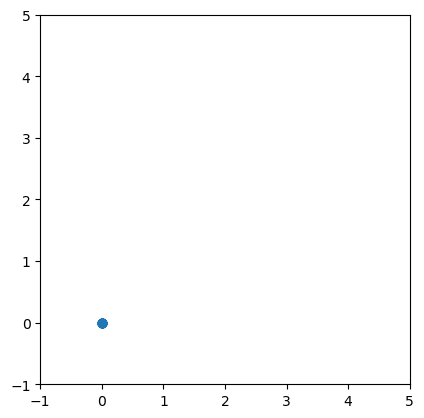

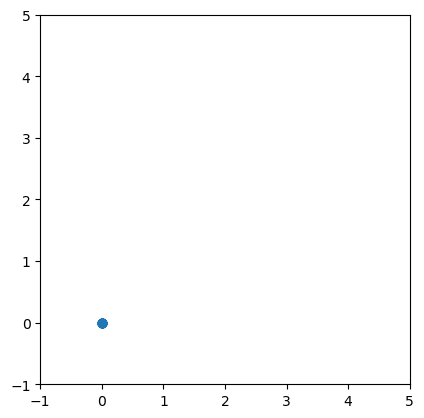

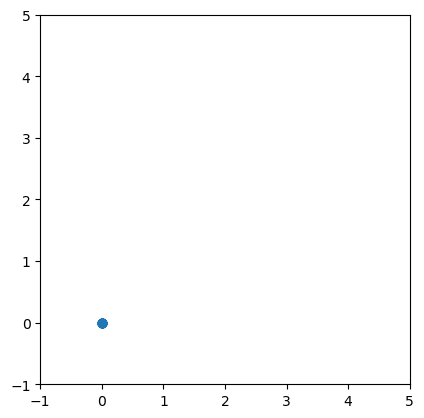

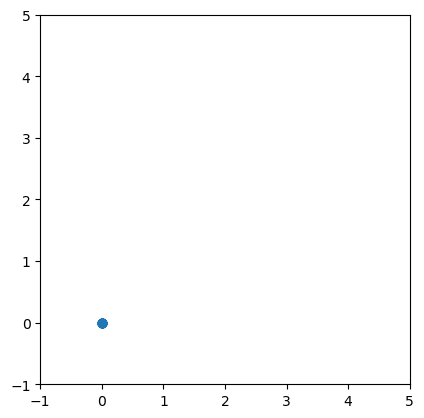

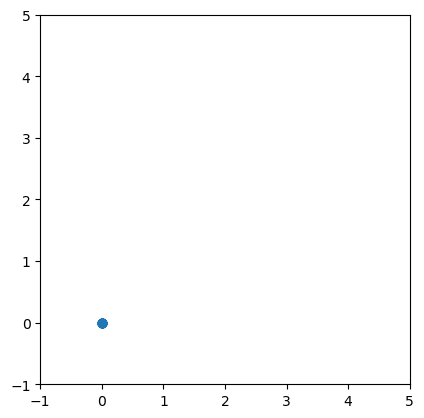

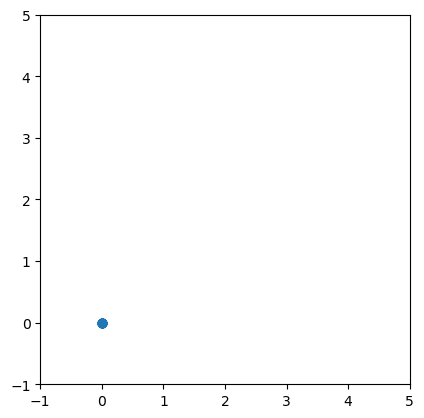

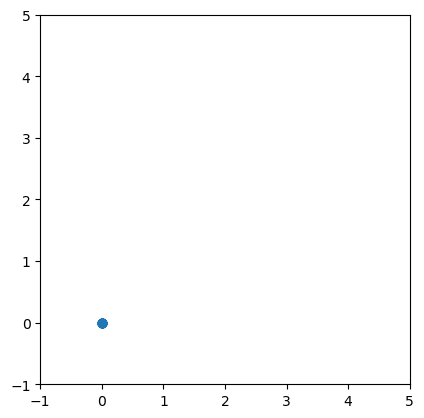

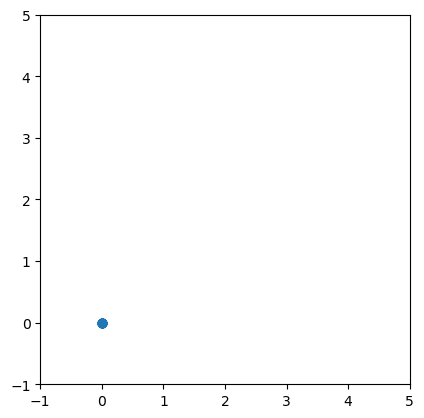

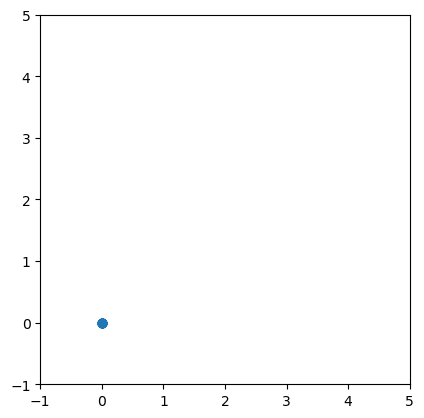

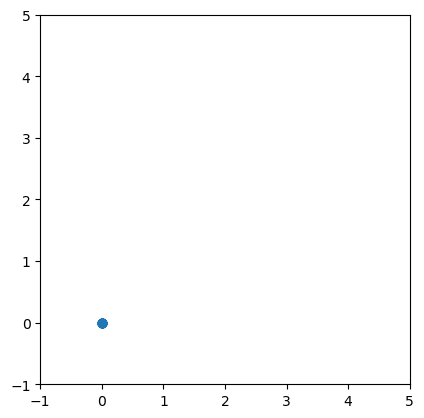

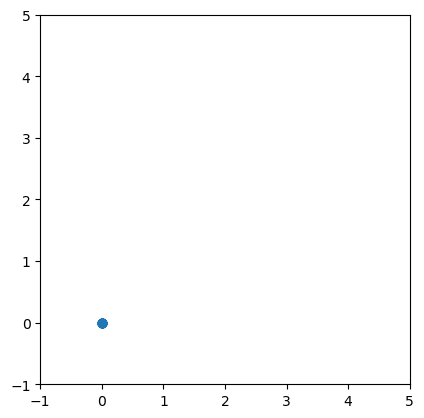

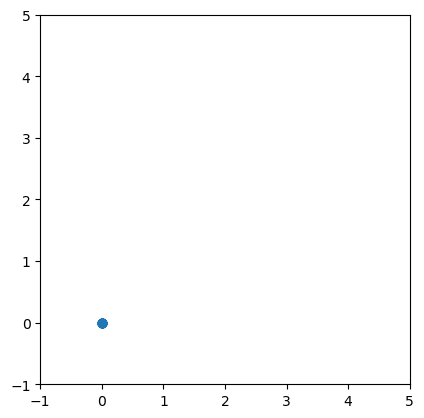

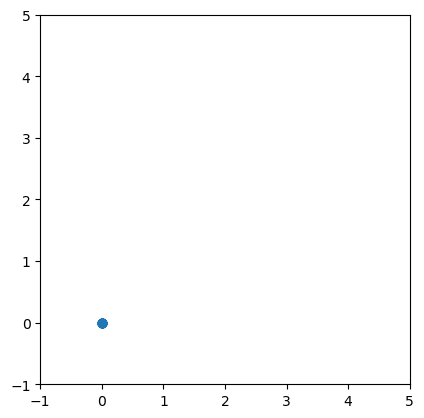

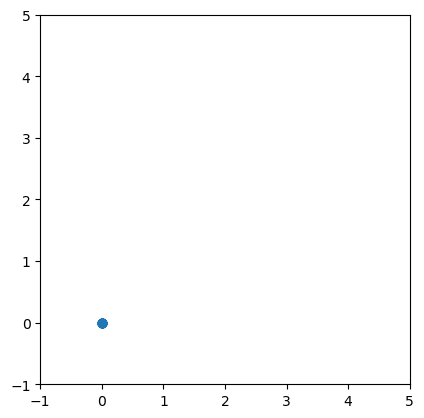

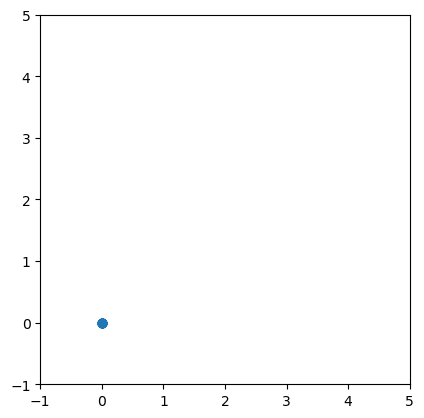

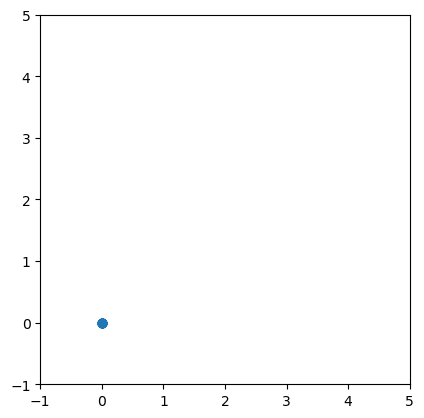

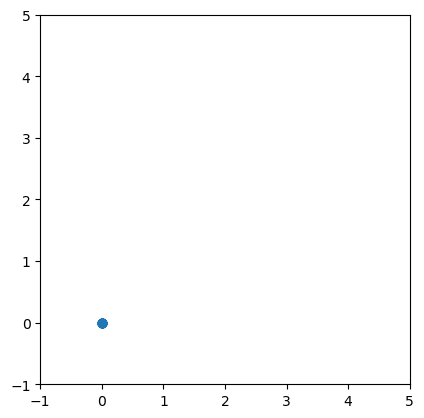

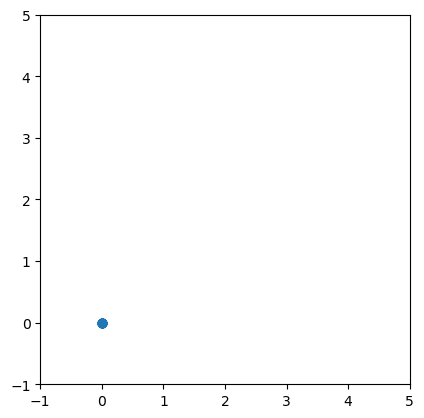

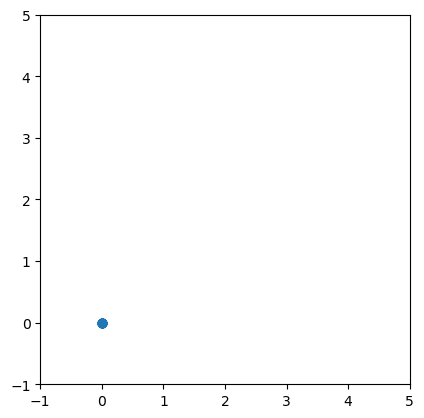

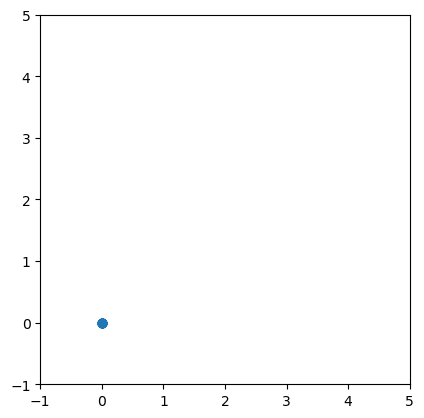

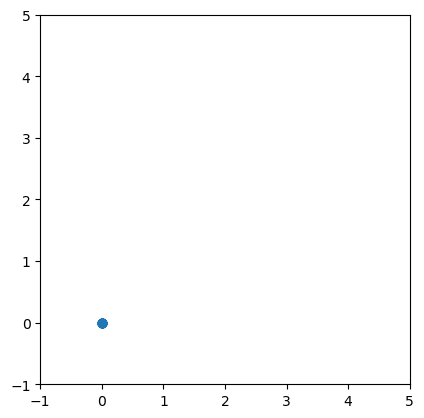

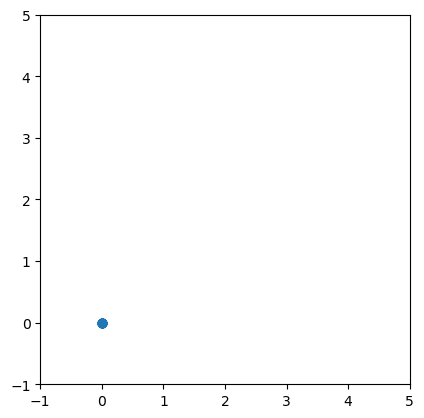

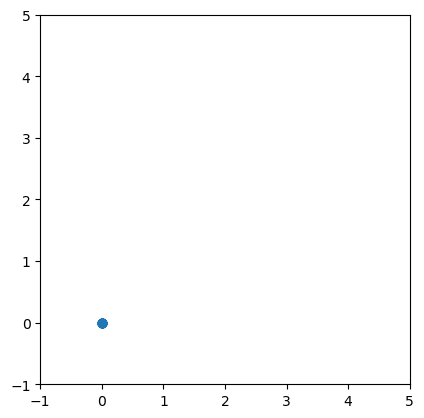

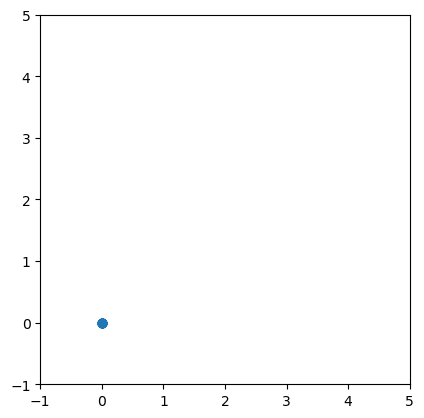

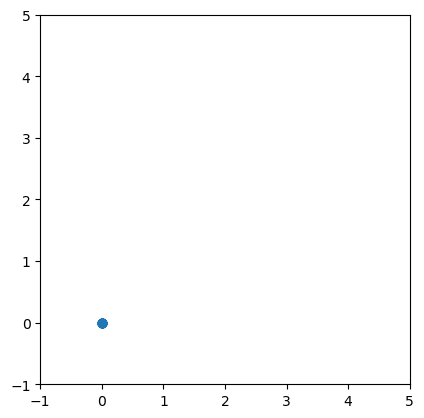

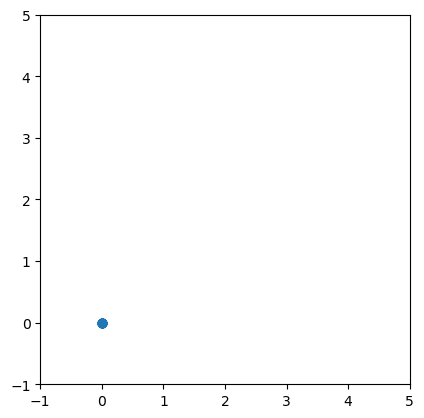

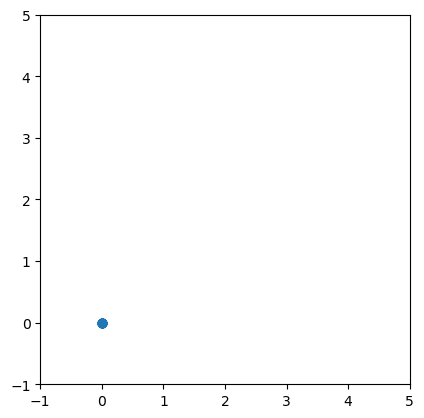

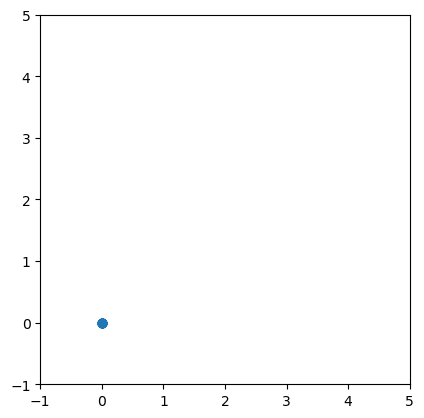

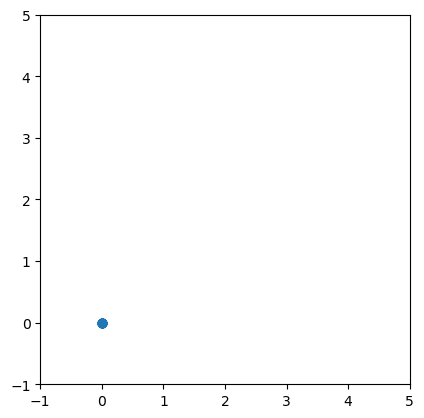

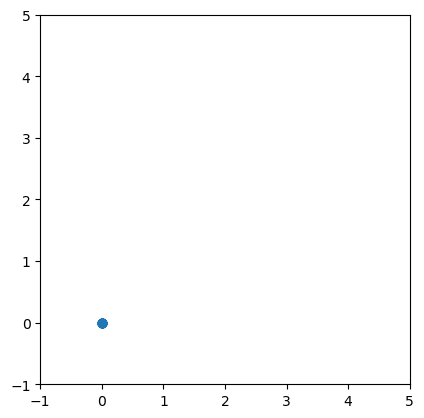

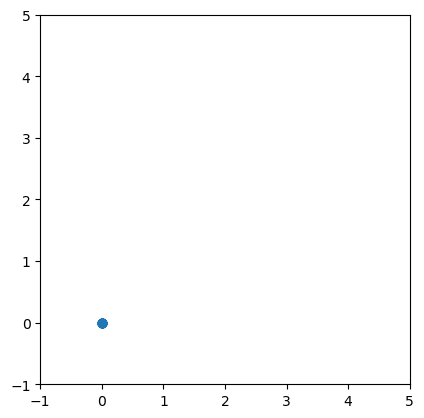

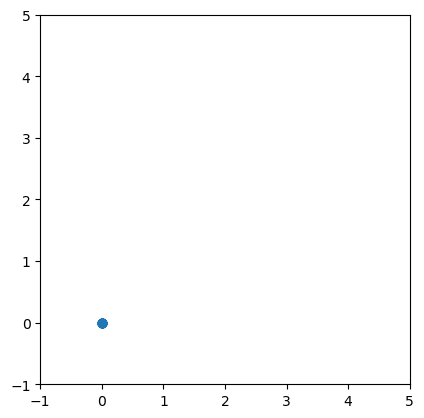

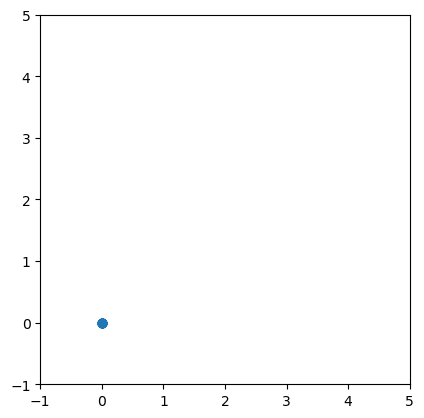

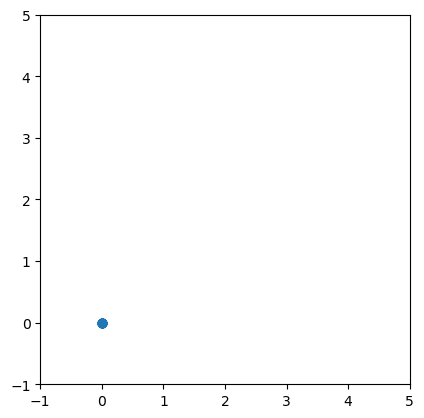

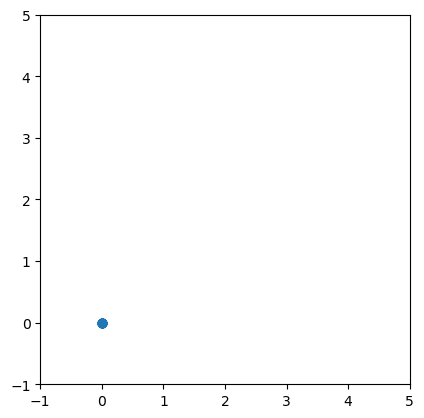

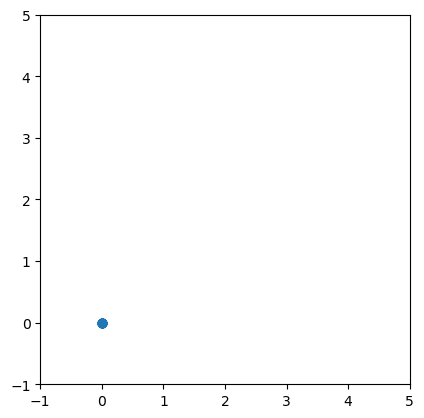

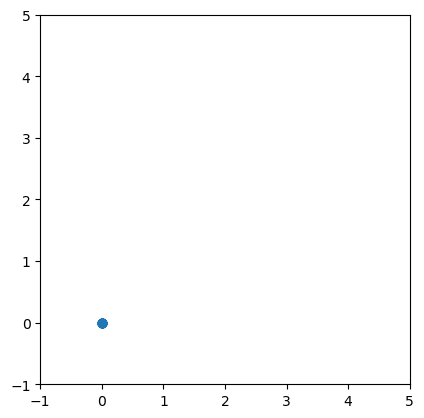

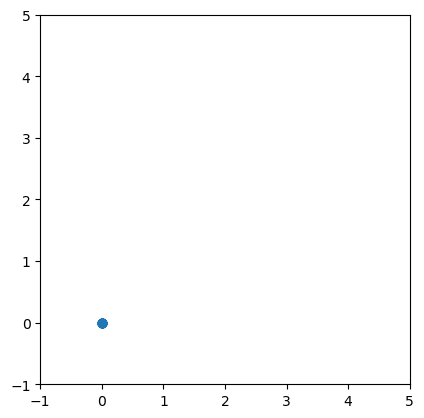

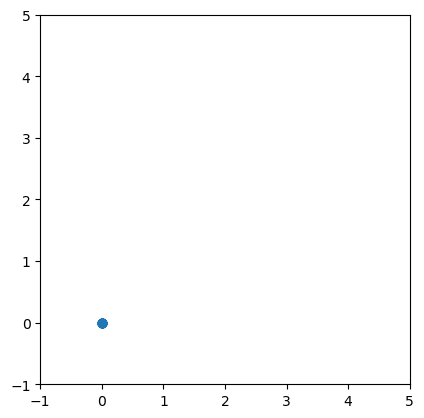

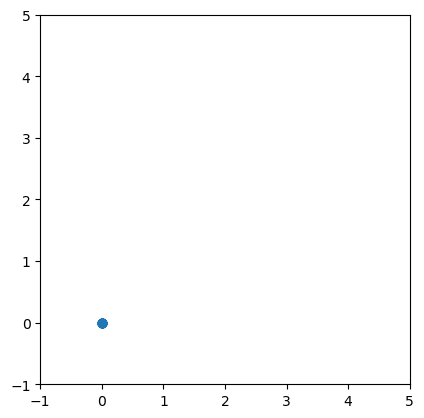

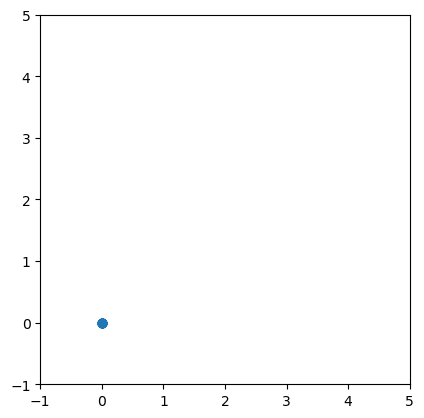

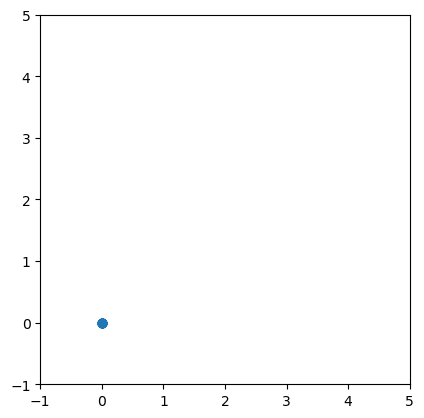

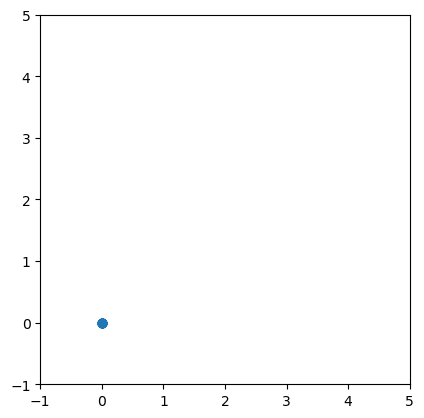

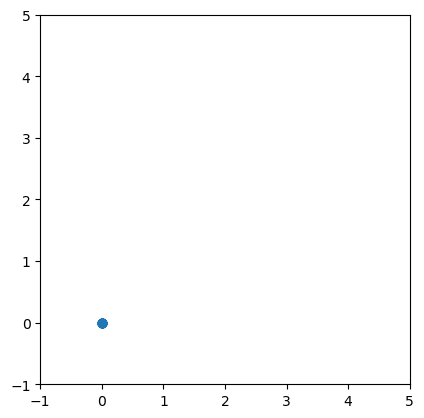

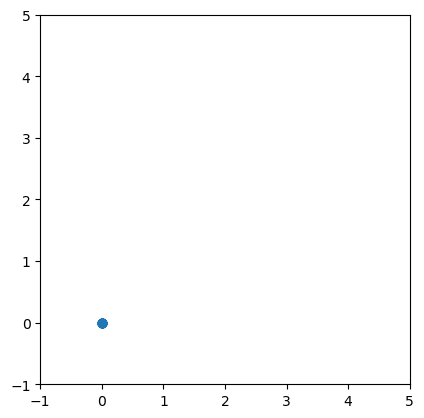

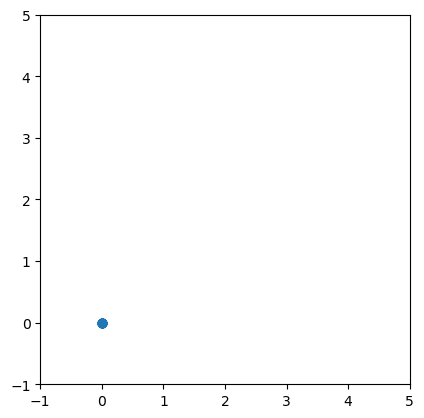

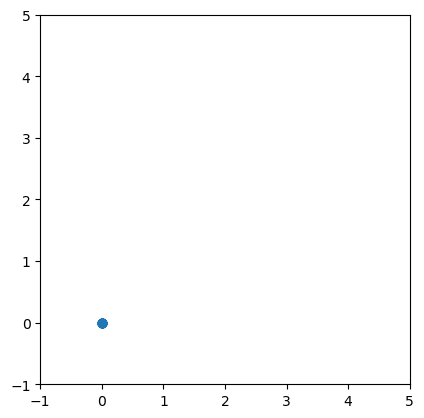

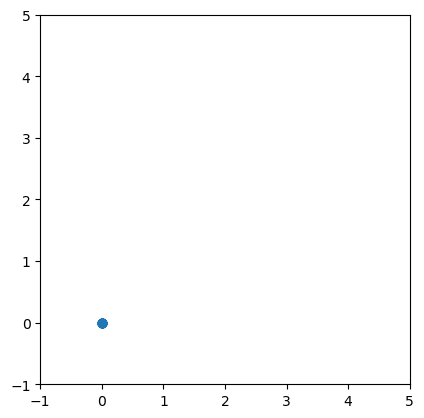

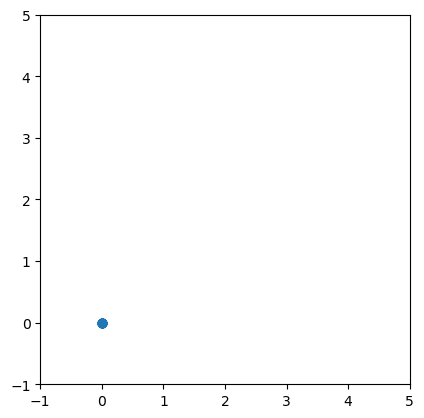

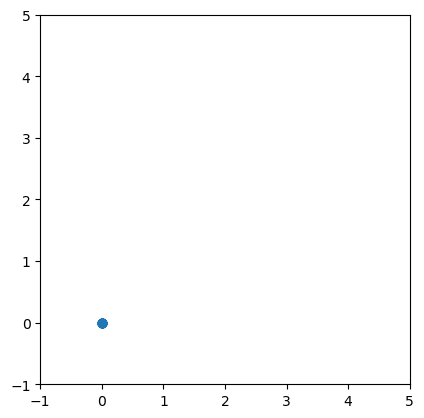

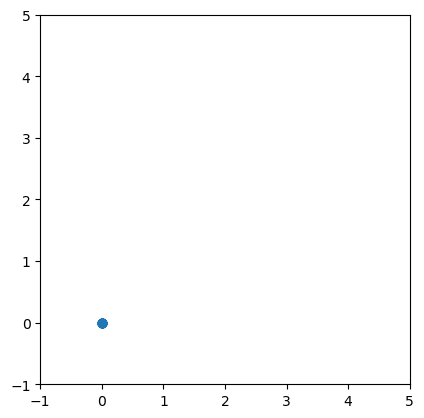

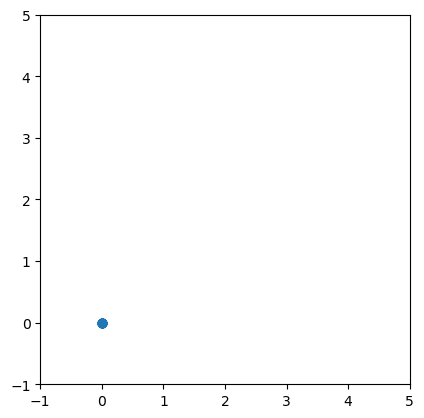

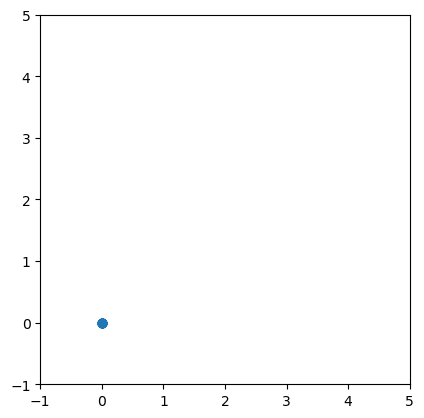

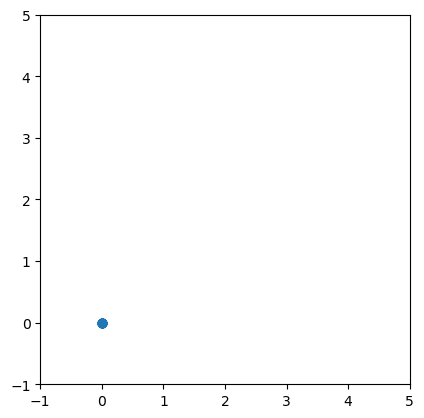

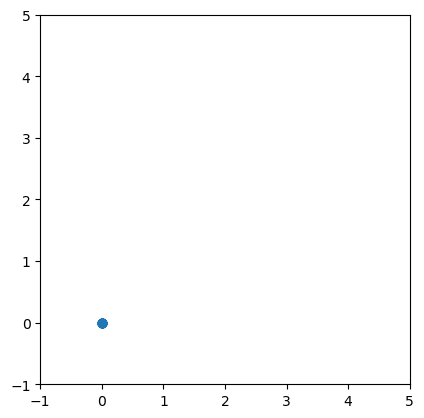

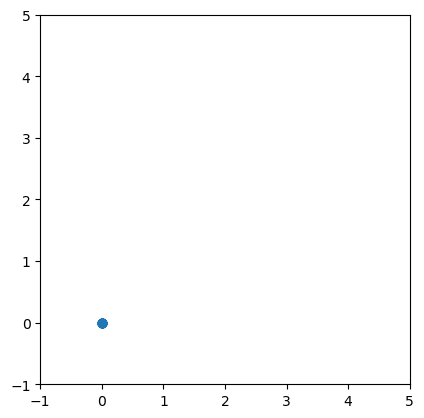

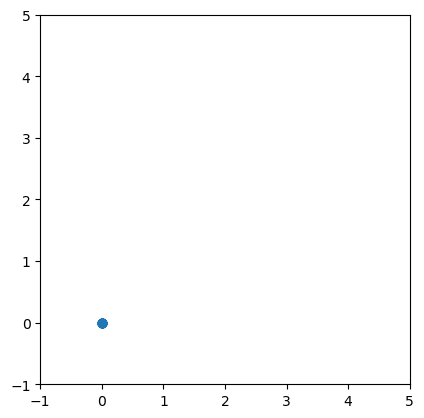

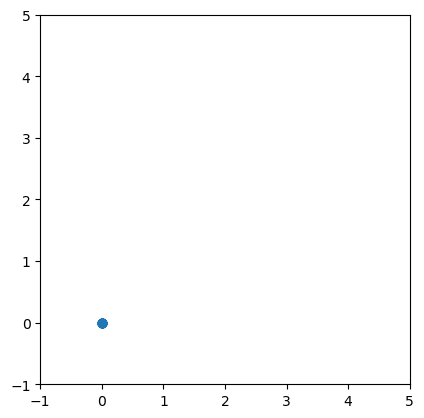

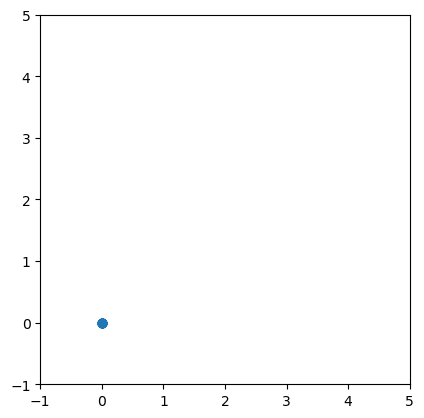

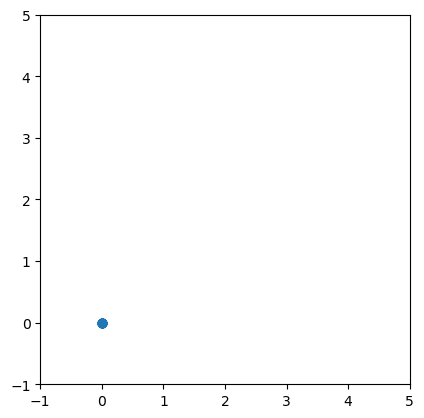

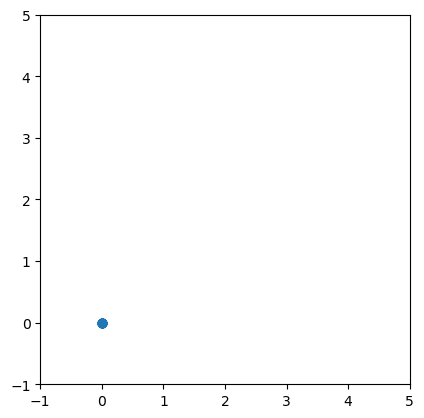

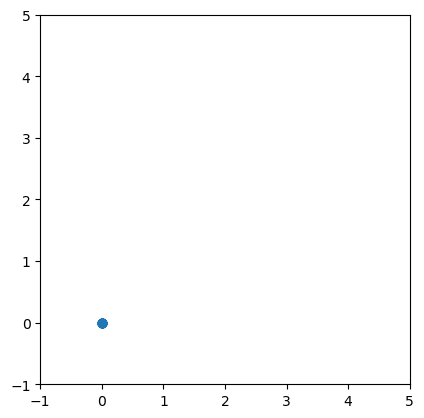

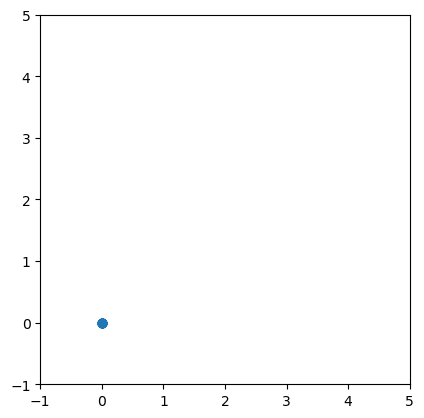

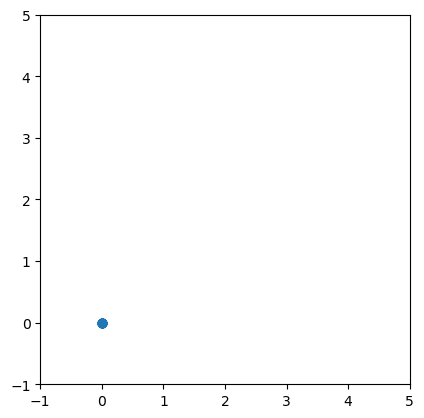

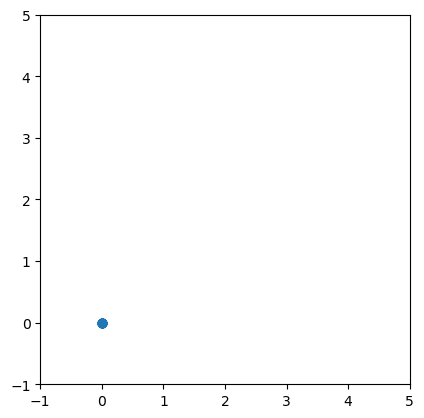

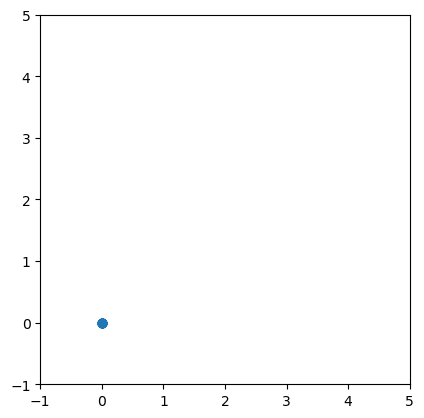

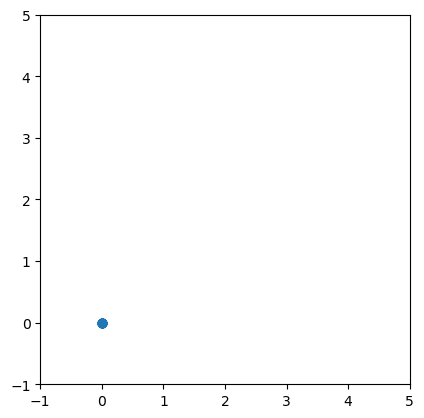

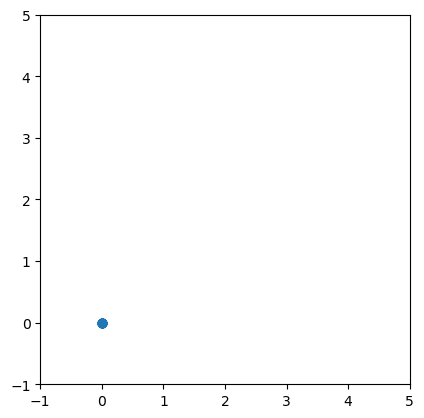

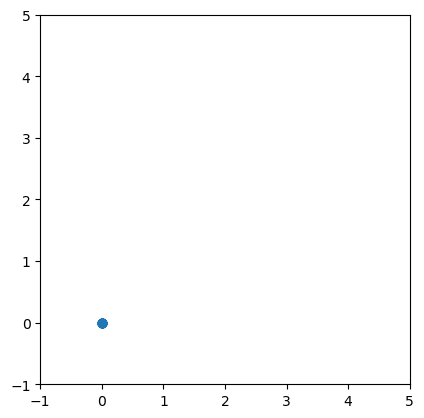

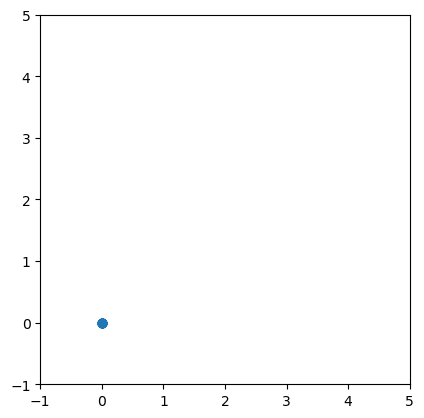

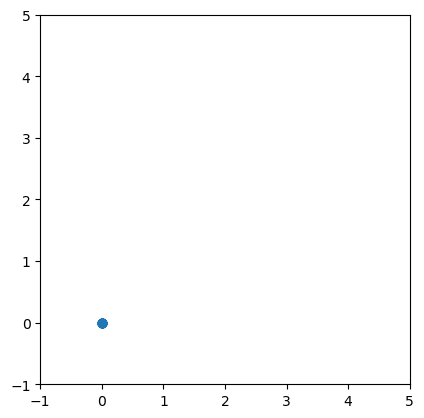

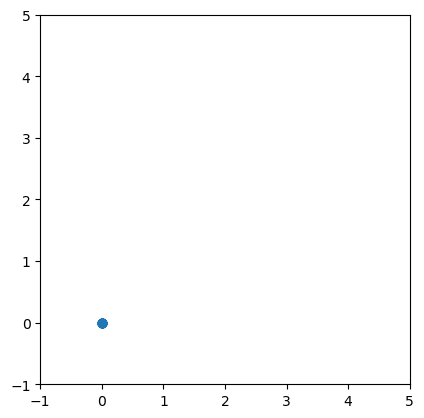

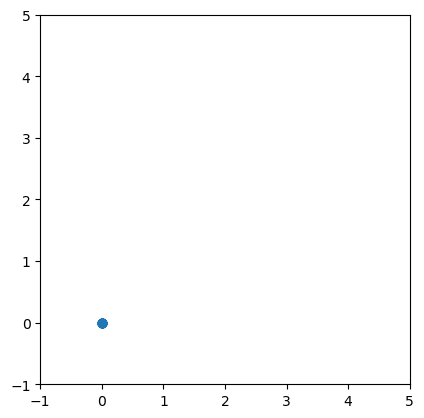

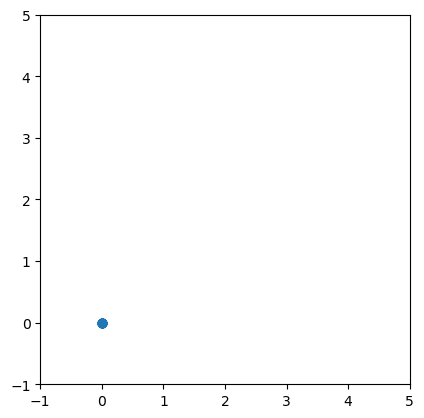

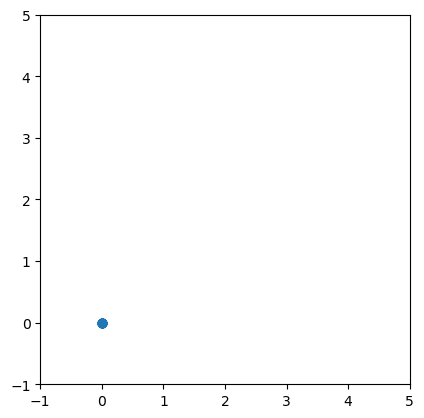

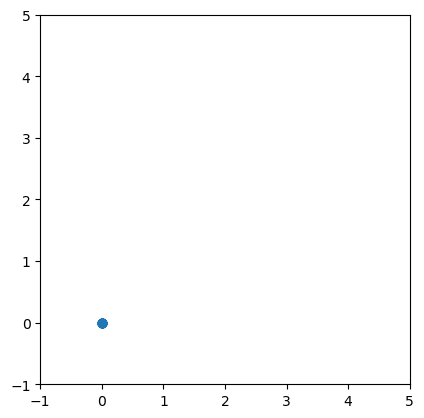

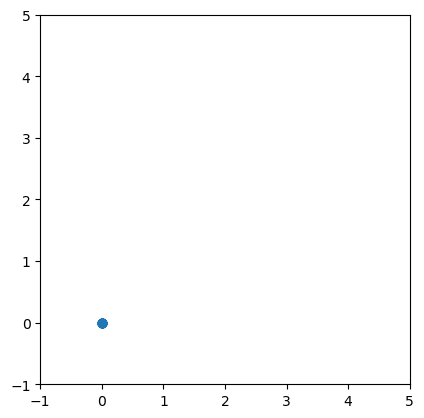

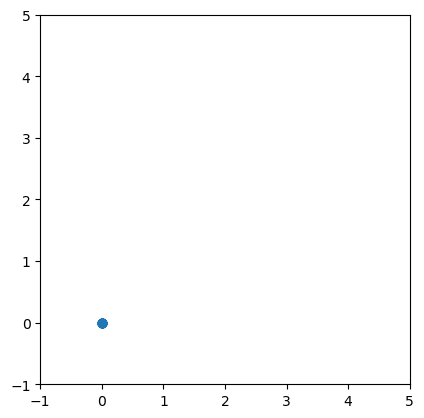

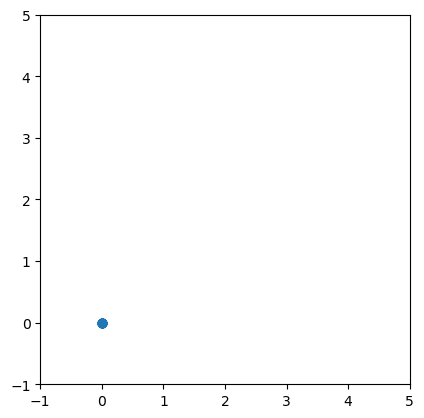

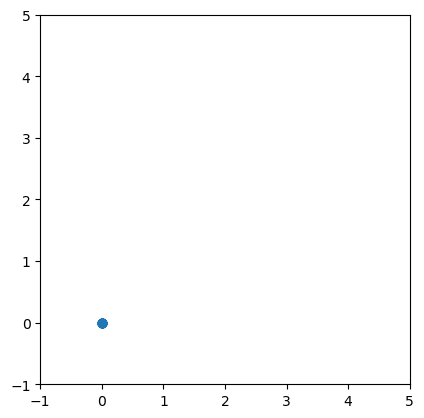

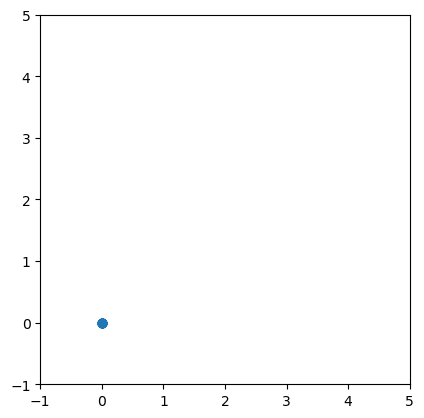

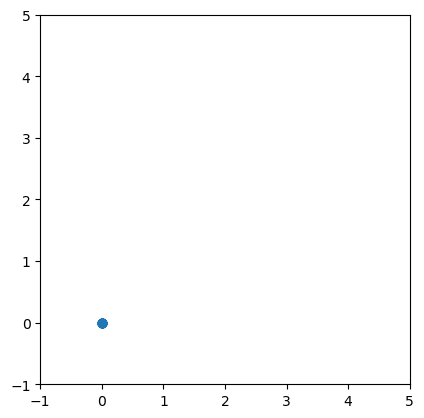

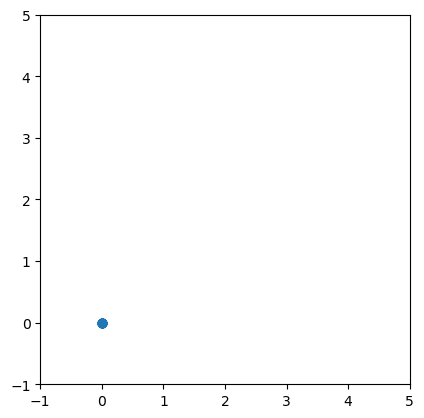

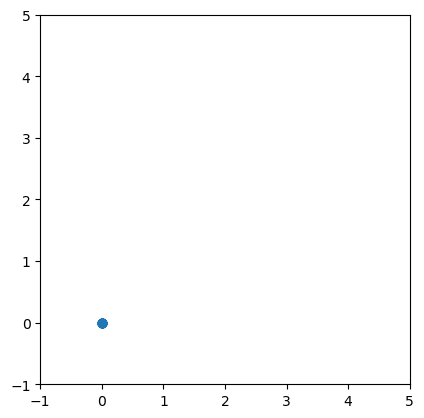

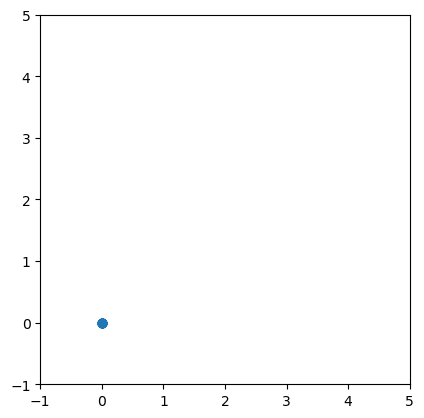

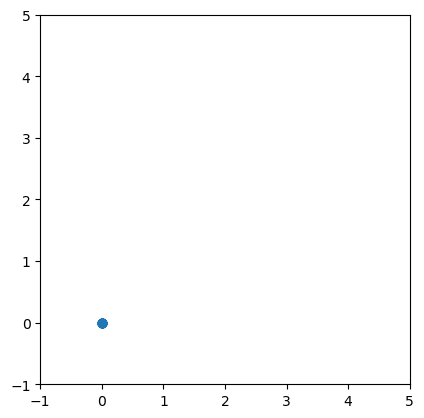

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_rows = 5  # Number of rows
num_cols = 5  # Number of columns
m = 1.0       # Mass of each particle
kx = 1.0      # Spring constant in the x-direction
ky = 1.0      # Spring constant in the y-direction
c = 0.1       # Damping coefficient
dt = 0.01     # Time step
num_steps = 100

# Create initial positions and velocities
positions = np.zeros((num_rows, num_cols, 2))
velocities = np.zeros((num_rows, num_cols, 2))

# Create a function to compute forces on each particle
def calculate_forces(positions, velocities):
    forces = np.zeros_like(positions)
    for i in range(num_rows):
        for j in range(num_cols):
            for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                ni, nj = i + dx, j + dy
                if 0 <= ni < num_rows and 0 <= nj < num_cols:
                    dx = positions[i, j] - positions[ni, nj]
                    dv = velocities[i, j] - velocities[ni, nj]
                    fx = -kx * dx[0] - c * dv[0]
                    fy = -ky * dx[1] - c * dv[1]
                    forces[i, j] += np.array([fx, fy])
    return forces

# Simulation loop
for step in range(num_steps):
    forces = calculate_forces(positions, velocities)
    accelerations = forces / m
    velocities += accelerations * dt
    positions += velocities * dt

    # Visualization (optional)
    plt.clf()
    plt.scatter(positions[:,:,0], positions[:,:,1])
    plt.xlim(-1, num_cols)
    plt.ylim(-1, num_rows)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.draw()
    plt.pause(0.01)

plt.show()